# Лабораторная работа

Давайте убедимся, что необходимые нам для этой работы библиотеки уже установлены.

In [1]:
!pip install -q numpy tensorflow_datasets tensorflow

In [2]:
# %pip list



Описание датасета:
- **PassengerId** ––– id пассажира, можно взять за индекс
- **Survived** (целевой признак) ––– выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass** ––– класс билета (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex** ––– пол (female или male)	
- **Age** ––– возраст в годах
- **SibSp** –––	количество братьев, сестёр (в том числе сводных) и супругов на борту	
- **Parch**	–––	количество детей и родителей на борту
- **Ticket** ––– номер билета	
- **Fare** ––– стоимость проезда пассажира	
- **Cabin** ––– номер каюты	
- **Embarked** ––– порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).


# Описание набора данных
В данной работе целью исследования будет набор данных Titanic. Данный набор содержит информацию о различных пассажирах корабля "Титаник", затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д. Мы предлагаем вам натренировать нейронную сеть для бинарной классификации, способную предсказывать вероятность спасения человека на основе его данных.  

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы - отдельный пассажир, вся информация о нем содержится в его строке. В столбце survived находится бинарная метка (0 или 1), означающая, спасся ли человек с корабля (1) или нет (0). Вашей задачей является изучить набор данных, корректно определить решаемую задачу, а затем построить модель, которая будет способна предсказывать вероятность спасения и посчитать F1-метрику на тестовом наборе данных.

Для загрузки набора данных мы будем использовать библиотеку tensorflow_datasets. 

Импортируем данную библиотеку, а затем с помощью нее загрузим набор данных "titanic". В процессе загрузки сразу разделим его на тренировочную, валидационную и тестовую выборку. Еще одну часть датасета мы зарезеривировали для оценки вашей модели  системой проверки на образовательной платформе.

In [3]:
import tensorflow_datasets as tfds
ds_train_tf, ds_validation_tf, ds_test_tf = tfds.load(
    name='titanic',
    split=['train[:70%]', 'train[70%:80%]', 'train[80%:90%]'],
)

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [5]:
print(f"Lengths: {len(ds_train_tf)}, {len(ds_validation_tf)}, {len(ds_test_tf)}")

Lengths: 916, 131, 131


In [6]:
ds_train_tf

<PrefetchDataset element_spec={'age': TensorSpec(shape=(), dtype=tf.float32, name=None), 'boat': TensorSpec(shape=(), dtype=tf.string, name=None), 'body': TensorSpec(shape=(), dtype=tf.int32, name=None), 'cabin': TensorSpec(shape=(), dtype=tf.string, name=None), 'embarked': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(), dtype=tf.float32, name=None), 'home.dest': TensorSpec(shape=(), dtype=tf.string, name=None), 'name': TensorSpec(shape=(), dtype=tf.string, name=None), 'parch': TensorSpec(shape=(), dtype=tf.int32, name=None), 'pclass': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sibsp': TensorSpec(shape=(), dtype=tf.int32, name=None), 'survived': TensorSpec(shape=(), dtype=tf.int64, name=None), 'ticket': TensorSpec(shape=(), dtype=tf.string, name=None)}>

По умолчанию библиотека загружает данные в формате TensorFlow Dataset. Этот формат позволяет оперировать данными на жестком диске без предварительной загрузки их в память, что позволят обучать модели на данных, превышающих размер оперативной памяти вашего устройства.

Набор данных Titanic является достаточно небольшим набором и мы уверены, что оперативной памяти вашего устройства хватит для хранения его целиком, поэтому это в данный момент не играет решающей роли. Однако, вам будет полезно научиться работать с ним.

Примеры использования и различных функций этого формата данных вы можете найти в документации или Jupyter Notebook'е данного курса, описывающем работу с библиотекой Keras.

Давайте выведем первую строку тренировочного набора данных для ознакомления.

In [14]:
for x, y in ds_train_tf.take(1):
    print(f"x={x}")
    print(f"y={y}")

2022-11-26 13:03:48.944106: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: too many values to unpack (expected 2)

In [15]:
# знакомство с методом
builder = tfds.builder('titanic')
info = builder.info
info.features
print(info.features.shape)
print(info.features.dtype)

{'pclass': (), 'survived': (), 'name': (), 'sex': (), 'age': (), 'sibsp': (), 'parch': (), 'ticket': (), 'fare': (), 'cabin': (), 'embarked': (), 'boat': (), 'body': (), 'home.dest': ()}
{'pclass': tf.int64, 'survived': tf.int64, 'name': tf.string, 'sex': tf.int64, 'age': tf.float32, 'sibsp': tf.int32, 'parch': tf.int32, 'ticket': tf.string, 'fare': tf.float32, 'cabin': tf.string, 'embarked': tf.int64, 'boat': tf.string, 'body': tf.int32, 'home.dest': tf.string}


In [16]:

print(info.features.shape)
print(info.features.dtype)

{'pclass': (), 'survived': (), 'name': (), 'sex': (), 'age': (), 'sibsp': (), 'parch': (), 'ticket': (), 'fare': (), 'cabin': (), 'embarked': (), 'boat': (), 'body': (), 'home.dest': ()}
{'pclass': tf.int64, 'survived': tf.int64, 'name': tf.string, 'sex': tf.int64, 'age': tf.float32, 'sibsp': tf.int32, 'parch': tf.int32, 'ticket': tf.string, 'fare': tf.float32, 'cabin': tf.string, 'embarked': tf.int64, 'boat': tf.string, 'body': tf.int32, 'home.dest': tf.string}


In [ ]:
# рабочий код
#df_train = pd.DataFrame(ds)
#df_train

In [17]:
# Вариант перевода даасета из тензора в дата фрейм
ds, info = tfds.load('titanic', split='train', with_info=True)
df= tfds.as_dataframe(ds.take(ds.__len__().numpy()))
# df_1= tfds.as_dataframe(ds.take(1)) - если надо распечатать 1 строку
df.head()


,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
0,30.0,b'Unknown',-1,b'Unknown',2,13.0000,"b'Sarnia, ON'","b'McCrie, Mr. James Matthew'",0,1,0,0,0,b'233478'
1,37.0,b'Unknown',98,b'Unknown',2,7.9250,"b'Ruotsinphytaa, Finland New York, NY'","b'Gustafsson, Mr. Anders Vilhelm'",0,2,0,2,0,b'3101276'
2,28.0,b'9',-1,b'Unknown',2,13.0000,b'Spain',"b'Reynaldo, Ms. Encarnacion'",0,1,1,0,1,b'230434'
3,18.0,b'Unknown',-1,b'Unknown',2,73.5000,"b'Lyndhurst, England'","b'Davies, Mr. Charles Henry'",0,1,0,0,0,b'S.O.C. 14879'
4,-1.0,b'Unknown',-1,b'Unknown',0,7.8958,b'Unknown',"b'Gheorgheff, Mr. Stanio'",0,2,0,0,0,b'349254'


In [ ]:
df.info()

Как можно заметить, формат текущего датасета представляет собой кортеж из двух элементов - признаков и метки класса. Признаки организованы как словарь с ключами (названиями признаков) и значениями признаков. Данный формат можно использовать напрямую для метода model.fit, однако признаки, несомненно, требуют предобработки.

Итак, к настоящему моменту мы загрузили набор данных, разделили его на тренировочную, валидационную и тестовую выборку и готовы приступить к решению задачи. Вашим текущим заданием является получение максимального значения F1-метрики на тестовом наборе данных, используя все возможности по изучению и визуализации данных, предобработке данных, а также нейронную сеть, выполненную с помощью фреймворка TensorFlow (и его части - Keras).  

В процессе исследования и тренировки запрещено использовать данные из ds_test кроме как для финальной оценки F1 метрики. 

После того, как вы добились максимального на ваш взгляд значения метрики F1 на тестовых данных, выполните предсказание для зарезервированной части датасета (ссылку на данные можно найти на странице с заданием). После чего введите полученные метки в поле ввода на платформе.


Вы можете найти для себя полезным пройти снова ноутбук с описанием работы фреймворка Keras и информацией о том, как его использовать. Также по данному фреймворку доступны многочисленные туториалы и примеры на его сайте. Напомним вам, что задача представляет собой бинарную классификацию, поэтому вам необходимо выбрать правильное количество нейронов для последнего слоя и функцию активации.

Успехов!

In [18]:
duplicateRows = df.duplicated()
print(duplicateRows)

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool


In [19]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1309 non-null   float32
 1   boat       1309 non-null   object 
 2   body       1309 non-null   int32  
 3   cabin      1309 non-null   object 
 4   embarked   1309 non-null   int64  
 5   fare       1309 non-null   float32
 6   home.dest  1309 non-null   object 
 7   name       1309 non-null   object 
 8   parch      1309 non-null   int32  
 9   pclass     1309 non-null   int64  
 10  sex        1309 non-null   int64  
 11  sibsp      1309 non-null   int32  
 12  survived   1309 non-null   int64  
 13  ticket     1309 non-null   object 
dtypes: float32(2), int32(3), int64(4), object(5)
memory usage: 127.8+ KB


In [20]:
df['name'].unique

<bound method Series.unique of 0                            b'McCrie, Mr. James Matthew'
1                       b'Gustafsson, Mr. Anders Vilhelm'
2                            b'Reynaldo, Ms. Encarnacion'
3                            b'Davies, Mr. Charles Henry'
4                               b'Gheorgheff, Mr. Stanio'
                              ...                        
1304                               b'Dooley, Mr. Patrick'
1305                       b'Gustafsson, Mr. Karl Gideon'
1306                               b'Peters, Miss. Katie'
1307    b'Goldsmith, Mrs. Frank John (Emily Alice Brown)'
1308                             b'West, Mr. Edwy Arthur'
Name: name, Length: 1309, dtype: object>

In [21]:
# изменяем тип данных в колонке Имя-пишем ф-ию
def bytes_to_str(col):
  col = [x.decode() if isinstance(x, bytes) else x for x in col]
  return col

In [22]:
df['name'] = bytes_to_str(df['name'])
df['name']

#for key in df.columns:
#   df[key] = bytes_to_str(df[key].values.tolist()) тоже для борьбы с bytes

0                            McCrie, Mr. James Matthew
1                       Gustafsson, Mr. Anders Vilhelm
2                            Reynaldo, Ms. Encarnacion
3                            Davies, Mr. Charles Henry
4                               Gheorgheff, Mr. Stanio
                             ...                      
1304                               Dooley, Mr. Patrick
1305                       Gustafsson, Mr. Karl Gideon
1306                               Peters, Miss. Katie
1307    Goldsmith, Mrs. Frank John (Emily Alice Brown)
1308                             West, Mr. Edwy Arthur
Name: name, Length: 1309, dtype: object

In [23]:
df['Mr_Mrs'] = 0
for i in df:
    df['Mr_Mrs']= df['name'].str.extract('([A-Za-z]+)\.') # выделим обращения
df['Mr_Mrs'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'], inplace=True)
df.loc[(df['Mr_Mrs'] == 'Mr') & (df['sex'] == 'female'), "Mr_Mrs"] = 'Mrs' # исправляем обращение к доктору женщине

In [24]:
df['Mr_Mrs']

0         Mr
1         Mr
2       Miss
3         Mr
4         Mr
        ... 
1304      Mr
1305      Mr
1306    Miss
1307     Mrs
1308      Mr
Name: Mr_Mrs, Length: 1309, dtype: object

In [25]:
# Предобработка данных

df.loc[(df['age'].isnull()) & (df['Mr_Mrs'] == 'Master'), 'age'] = 5
df.loc[(df['age'].isnull()) & (df['Mr_Mrs'] == 'Miss'), 'age'] = 22
df.loc[(df['age'].isnull()) & (df['Mr_Mrs'] == 'Mr'), 'age'] = 33
df.loc[(df['age'].isnull()) & (df['Mr_Mrs'] == 'Mrs'), 'age'] = 36
df.loc[(df['age'].isnull()) & (df['Mr_Mrs'] == 'Other'), 'age'] = 46

df['embarked'].fillna('S', inplace=True)

df['Age_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['age'] <= 16, 'Age_category'] = 0  # далле разбиваем возраста на 5 категорий
df.loc[(df['age'] > 16) & (df['age'] <= 32), 'Age_category'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'Age_category'] = 2
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'Age_category'] = 3
df.loc[df['age'] > 64, 'Age_category'] = 4

df['Family_Size'] = 0
df['Family_Size'] = df['parch'] + df['sibsp']  # размер семьи
df['Alone'] = 0
df.loc[df['Family_Size'] == 0, 'Alone'] = 1  # путешествовал ли пассажир один

df['Fare_category'] = pd.qcut(df['fare'], 5)
df['Fare_category'] = 0
df.loc[df['fare'] <= 7.91, 'Fare_category'] = 0
df.loc[(df['fare'] > 7.91) & (df['fare'] <= 14.454), 'Fare_category'] = 1
df.loc[(df['fare'] > 14.454) & (df['fare'] <= 31), 'Fare_category'] = 2
df.loc[(df['fare'] > 31) & (df['fare'] <= 513), 'Fare_category'] = 3

df['sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df['Mr_Mrs'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

df.drop(['name', 'age', 'ticket', 'sibsp', 'parch', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)


In [26]:
'''
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['survived']) 
label_encoder.transform(df['survived']) 
'''

"\nfrom sklearn import preprocessing \nlabel_encoder = preprocessing.LabelEncoder() \nlabel_encoder.fit(df['survived']) \nlabel_encoder.transform(df['survived']) \n"

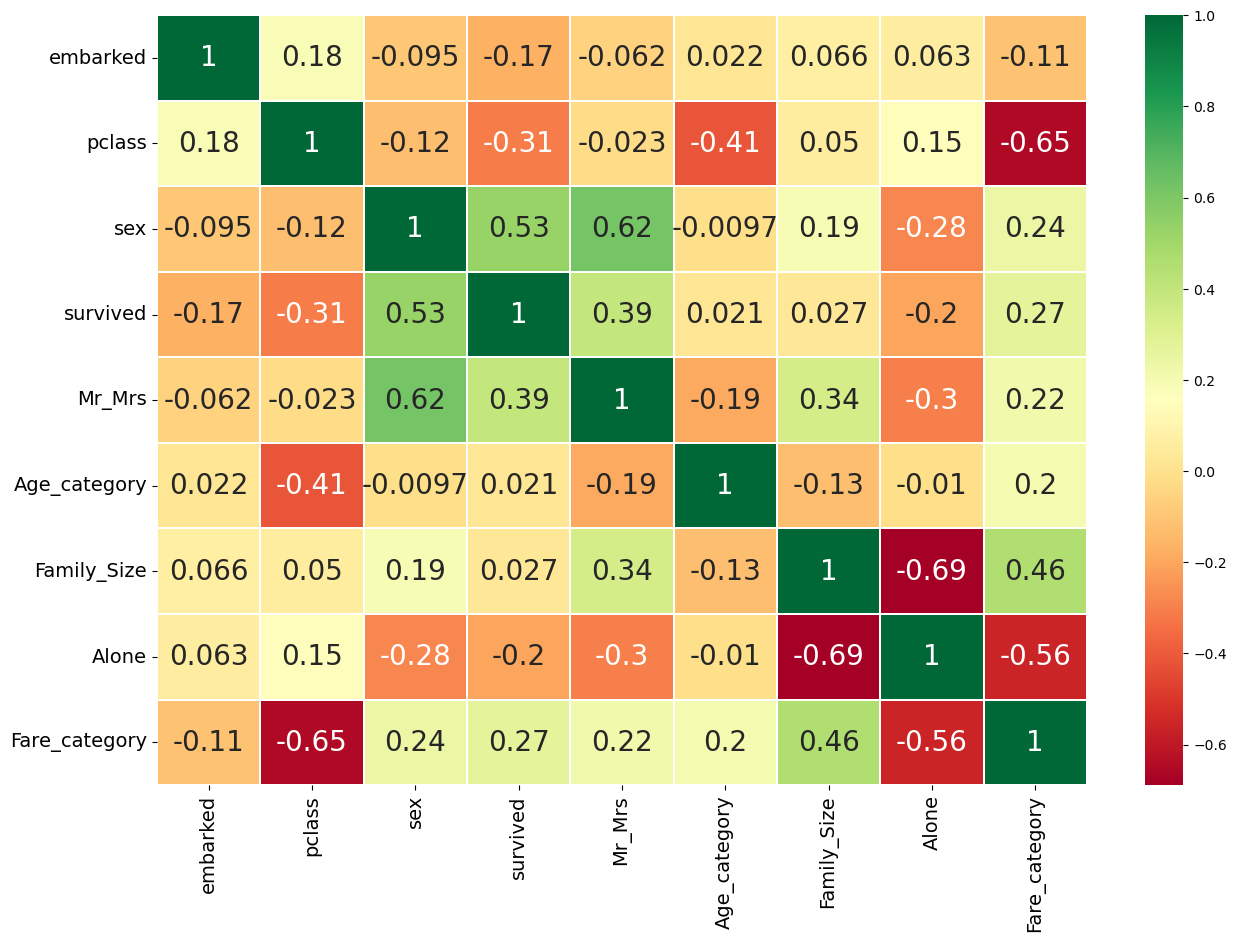

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
# почему-то опять дубликаты, хотя вначале удаляли
duplicateRows = df.duplicated()
print(duplicateRows)

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306    False
1307     True
1308    False
Length: 1309, dtype: bool


In [29]:
df=df.drop_duplicates()


In [30]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1282    False
1288    False
1299    False
1306    False
1308    False
Length: 441, dtype: bool


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   embarked       441 non-null    int64
 1   pclass         441 non-null    int64
 2   sex            441 non-null    int64
 3   survived       441 non-null    int64
 4   Mr_Mrs         441 non-null    int64
 5   Age_category   441 non-null    int64
 6   Family_Size    441 non-null    int32
 7   Alone          441 non-null    int64
 8   Fare_category  441 non-null    int64
dtypes: int32(1), int64(8)
memory usage: 32.7 KB


In [32]:
# 2. Инженерия признаков: генерация или выделение наиболее интересных признаков, удаление ненужных
cols = ["pclass","sex","embarked","Mr_Mrs","Age_category","Family_Size","Alone","Fare_category"] 
X = df[cols]
y = df['survived']

In [33]:
df.head()

,embarked,pclass,sex,survived,Mr_Mrs,Age_category,Family_Size,Alone,Fare_category
0,2,1,0,0,0,1,0,1,1
1,2,2,0,0,0,2,2,0,1
2,2,1,1,1,2,1,0,1,1
3,2,1,0,0,0,1,0,1,3
4,0,2,0,0,0,0,0,1,0


In [34]:
df = df.dropna()

In [ ]:
'''
def dataframe_to_dataset(dataframe):
    dataframe = df.copy()
    labels = df.pop(y)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds
'''

In [ ]:
# пытаюсь перевести в тензор, возникают какие-то наны???
#dataframe_to_dataset(df)

In [35]:
input_shape = (len(X_train),)     # Наши данные - одномерный массив с размерностью 8
batch_size = 10         # Размер батча на текущий момент можно выбрать любым, мы рассмотрим его оптимальный выбор далее в рамках курса
amount_of_classes = 1

In [36]:
# т к не получилось перевести в тензор-пытаюсь работать с датафреймом
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)


scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_valid_scaled = scaler.transform(X_valid)

In [37]:
#проверка на другой модели - работает
from sklearn.svm import SVC

svm = SVC(random_state=11)
svm.fit(X_train_scaled, y_train)
print("train accuracy:", svm.score(X_train_scaled, y_train))
print("valid accuracy:", svm.score(X_valid_scaled, y_valid))

train accuracy: 0.7556818181818182
valid accuracy: 0.6853932584269663


In [38]:
X_valid_scaled.shape

(89, 8)

In [39]:
X_train_scaled.shape

(352, 8)

In [40]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import metrics

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import layers

In [42]:
model = keras.Sequential()


In [43]:
model.add(layers.InputLayer(input_shape = input_shape, batch_size = batch_size))

In [44]:
model.add(layers.Dense(32, activation = activations.sigmoid))
model.add(layers.Dense(16, activation = 'sigmoid'))

In [45]:
model.add(layers.Dense(amount_of_classes, activation = activations.softmax))

In [46]:
model.compile(
    optimizer = optimizers.Adam(learning_rate = 0.003),
    loss = losses.CategoricalCrossentropy(),
    metrics = [metrics.CategoricalAccuracy()]
)

In [47]:
# Обучаю можель на дата фрейме - не получается. очевидно из за отсутствия One-hot??? Но как его применить к дата фрейму?
history = model.fit(X_train_scaled, y_train,  batch_size=10, epochs=45, validation_data=(X_valid_scaled, y_valid), verbose=1)

Epoch 1/45
32/36 [=========================>....] - ETA: 0s - loss: 0.0000e+00 - categorical_accuracy: 1.0000

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/categorical_crossentropy/softmax_cross_entropy_with_logits/mul' defined at (most recent call last):
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/5w/r5g0f26x6hn1b4tbj04864y80000gp/T/ipykernel_69463/4050806755.py", line 2, in <module>
      history = model.fit(X_train_scaled, y_train,  batch_size=10, epochs=45, validation_data=(X_valid_scaled, y_valid), verbose=1)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/categorical_crossentropy/softmax_cross_entropy_with_logits/mul'
Incompatible shapes: [2,1] vs. [10,1]
	 [[{{node gradient_tape/categorical_crossentropy/softmax_cross_entropy_with_logits/mul}}]] [Op:__inference_train_function_19674]

In [ ]:
# Обучение модели

In [ ]:
# 1. Выбор модели или ансамбля моделей

In [ ]:
# 2. Поиск оптимальных гиперпараметров на validation наборе данных

In [ ]:
# Оценка модели

In [ ]:
# 1. Получение F1-метрики на тестовом наборе данных

In [ ]:
# Предсказание для данных из зарезервированной части 

In [ ]:
# 1. Отправка предсказанных меток через образовательную платформу